In [1]:
import numpy as np
import pandas as pd

In [2]:
data_files = [
    'UNSW-NB15_1.csv',
    'UNSW-NB15_2.csv',
    'UNSW-NB15_3.csv',
    'UNSW-NB15_4.csv',
]

df = pd.concat((pd.read_csv(f) for f in data_files), ignore_index=True)

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_17256\2787655553.py:8: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in data_files), ignore_index=True)
C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_17256\2787655553.py:8: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in data_files), ignore_index=True)


In [3]:
df = df[["srcip", "sport", "dstip", "dsport", "proto", "dur", "sbytes", "dbytes", "service", "Spkts", "Dpkts", "Label"]]

In [4]:
# ลบแถวที่มีค่า "-"
df = df[df != "-"].dropna()

In [5]:
df.head()

,srcip,sport,dstip,dsport,proto,dur,sbytes,dbytes,service,Spkts,Dpkts,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,0.001055,132,164,dns,2,2,0
2,59.166.0.6,1464,149.171.126.7,53,udp,0.001119,146,178,dns,2,2,0
3,59.166.0.5,3593,149.171.126.5,53,udp,0.001209,132,164,dns,2,2,0
4,59.166.0.3,49664,149.171.126.0,53,udp,0.001169,146,178,dns,2,2,0
6,59.166.0.6,2142,149.171.126.4,53,udp,0.001134,132,164,dns,2,2,0


In [6]:
# รีเซ็ตดัชนีหลังจากการลบแถว
df.reset_index(drop=True, inplace=True)

In [7]:
df.head()

,srcip,sport,dstip,dsport,proto,dur,sbytes,dbytes,service,Spkts,Dpkts,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,0.001055,132,164,dns,2,2,0
1,59.166.0.6,1464,149.171.126.7,53,udp,0.001119,146,178,dns,2,2,0
2,59.166.0.5,3593,149.171.126.5,53,udp,0.001209,132,164,dns,2,2,0
3,59.166.0.3,49664,149.171.126.0,53,udp,0.001169,146,178,dns,2,2,0
4,59.166.0.6,2142,149.171.126.4,53,udp,0.001134,132,164,dns,2,2,0


In [14]:
X = df.drop(columns='Label')
y = df['Label']
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# แปลงค่าในคอลัมน์ 'sport' และ 'dsport' ให้เป็นประเภท str โดยใช้ astype(str)
X['sport'] = X['sport'].astype(str)
X['dsport'] = X['dsport'].astype(str)
X['dur'] = X['dur'].astype(str)

# ใช้ Label Encoding กับคอลัมน์ 'srcip', 'dstip', 'proto', 'service', 'sport', และ 'dsport'
X['srcip'] = label_encoder.fit_transform(X['srcip'])
X['dstip'] = label_encoder.fit_transform(X['dstip'])
X['proto'] = label_encoder.fit_transform(X['proto'])
X['service'] = label_encoder.fit_transform(X['service'])
X['sport'] = label_encoder.fit_transform(X['sport'])
X['dsport'] = label_encoder.fit_transform(X['dsport'])
X['dur'] = label_encoder.fit_transform(X['dur'])

# ตรวจสอบประเภทของข้อมูลใน
print(X.dtypes)

srcip      int32
sport      int32
dstip      int32
dsport     int32
proto      int32
dur        int32
sbytes     int64
dbytes     int64
service    int32
Spkts      int64
Dpkts      int64
dtype: object


In [15]:
print(y.unique())

[0 1]


In [16]:
label_counts = df['Label'].value_counts()
print(label_counts)

Label
0    1052244
1     241406
Name: count, dtype: int64


In [17]:
from imblearn.under_sampling import RandomUnderSampler

# กำหนด desired_count
desired_count = y.value_counts()[1]

# สร้าง RandomUnderSampler object
rus = RandomUnderSampler(sampling_strategy={0: desired_count, 1: desired_count}, random_state=42)

# Apply the undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)


In [18]:
X_resampled.head()

,srcip,sport,dstip,dsport,proto,dur,sbytes,dbytes,service,Spkts,Dpkts
648951,9,41161,24,771,1,299844,264,0,1,2,0
115100,15,9686,16,771,1,215,146,178,1,2,2
234401,18,38883,20,1629,0,164622,1684,10168,4,14,18
1199283,1,41161,21,771,1,300820,264,0,1,2,0
152104,21,16208,13,1629,0,161550,1580,10168,4,12,18


In [19]:
X_resampled.reset_index(drop=True, inplace=True)

In [20]:
X_resampled.head()

,srcip,sport,dstip,dsport,proto,dur,sbytes,dbytes,service,Spkts,Dpkts
0,9,41161,24,771,1,299844,264,0,1,2,0
1,15,9686,16,771,1,215,146,178,1,2,2
2,18,38883,20,1629,0,164622,1684,10168,4,14,18
3,1,41161,21,771,1,300820,264,0,1,2,0
4,21,16208,13,1629,0,161550,1580,10168,4,12,18


In [21]:
X_resampled.shape

(482812, 11)

In [33]:
from imblearn.under_sampling import RandomUnderSampler

# กำหนด desired_count
desired_count = 80000

# สร้าง RandomUnderSampler object
rus = RandomUnderSampler(sampling_strategy={0: desired_count, 1: desired_count}, random_state=0)

# Apply the undersampling
X_resampled_reduced, y_resampled_reduced = rus.fit_resample(X_resampled, y_resampled)


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled_reduced, y_resampled_reduced, test_size=0.2, random_state=0)


In [35]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

# Logistical Classification

In [36]:
# โมเดล Logistic Regression และการทดสอบ
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test) 
end_predict = time.time()

C:\Users\NITRO 5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 87.99%
Recall: 87.99%
Precision: 88.09%
F1-Score: 87.98%
time to train: 0.78 s
time to predict: 0.00 s
total: 0.79 s


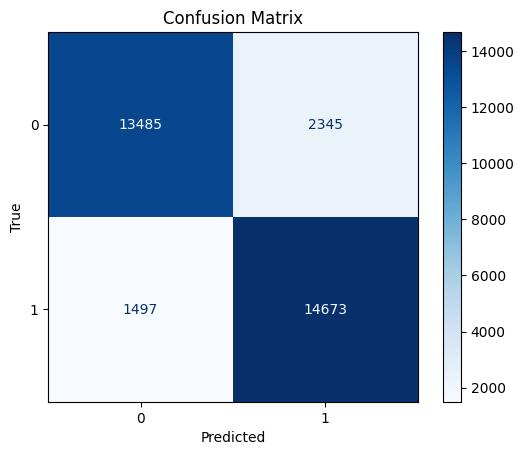

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_predictions)

# Create a ConfusionMatrixDisplay object
cm = ConfusionMatrixDisplay(confusion, display_labels=model.classes_)

# Plot the confusion matrix with a custom colormap
cm.plot(cmap=plt.cm.Blues)  # You can specify the format of the values (in this case, integer format)

# Add labels for x and y axis
plt.xlabel('Predicted')
plt.ylabel('True')

# Set the title
plt.title('Confusion Matrix')

plt.show()

# kNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
model = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()


In [40]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['kNN'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 98.43%
Recall: 98.43%
Precision: 98.44%
F1-Score: 98.43%
time to train: 0.29 s
time to predict: 2.52 s
total: 2.81 s


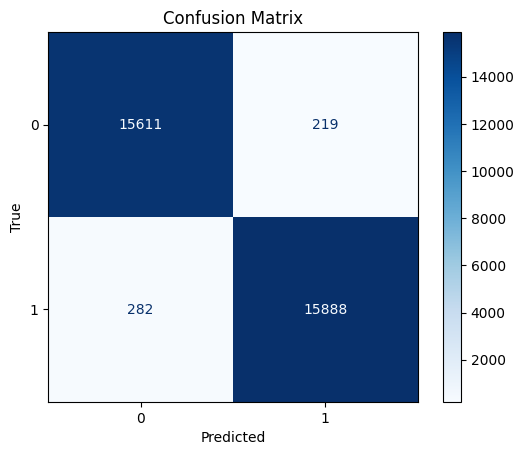

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_predictions)

# Create a ConfusionMatrixDisplay object
cm = ConfusionMatrixDisplay(confusion, display_labels=model.classes_)

# Plot the confusion matrix with a custom colormap
cm.plot(cmap=plt.cm.Blues)  # You can specify the format of the values (in this case, integer format)

# Add labels for x and y axis
plt.xlabel('Predicted')

plt.ylabel('True')

# Set the title
plt.title('Confusion Matrix')

plt.show()

# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [43]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 99.72%
Recall: 99.72%
Precision: 99.73%
F1-Score: 99.73%
time to train: 0.16 s
time to predict: 0.01 s
total: 0.17 s


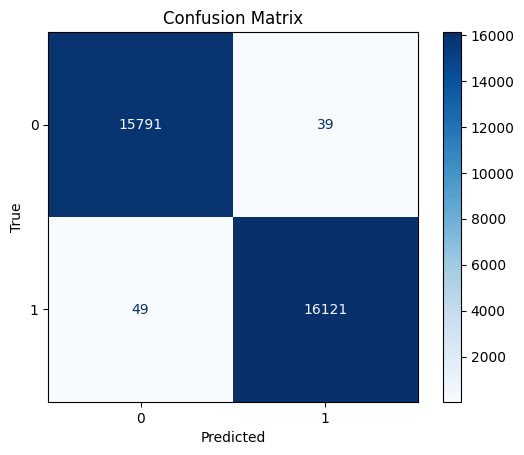

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_predictions)

# Create a ConfusionMatrixDisplay object
cm = ConfusionMatrixDisplay(confusion, display_labels=model.classes_)

# Plot the confusion matrix with a custom colormap
cm.plot(cmap=plt.cm.Blues)  # You can specify the format of the values (in this case, integer format)

# Add labels for x and y axis
plt.xlabel('Predicted')

plt.ylabel('True')

# Set the title
plt.title('Confusion Matrix')

plt.show()

# Extra Trees

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
start = time.time()
model = ExtraTreesClassifier(random_state=0,n_jobs=-1).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [46]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Extra Trees'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 99.80%
Recall: 99.80%
Precision: 99.80%
F1-Score: 99.80%
time to train: 0.92 s
time to predict: 0.05 s
total: 0.98 s


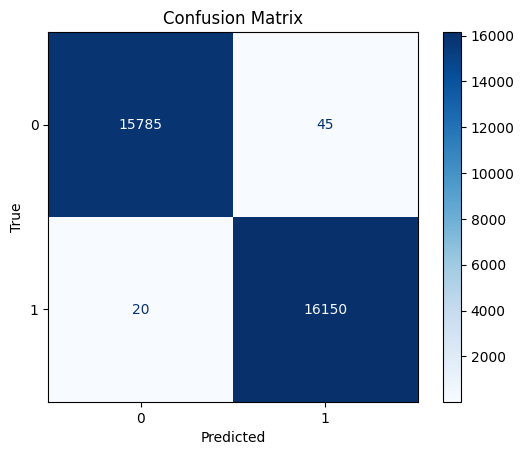

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_predictions)

# Create a ConfusionMatrixDisplay object
cm = ConfusionMatrixDisplay(confusion, display_labels=model.classes_)

# Plot the confusion matrix with a custom colormap
cm.plot(cmap=plt.cm.Blues)  # You can specify the format of the values (in this case, integer format)

# Add labels for x and y axis
plt.xlabel('Predicted')

plt.ylabel('True')

# Set the title
plt.title('Confusion Matrix')

plt.show()

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [49]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 99.83%
Recall: 99.83%
Precision: 99.83%
F1-Score: 99.83%
time to train: 1.47 s
time to predict: 0.05 s
total: 1.52 s


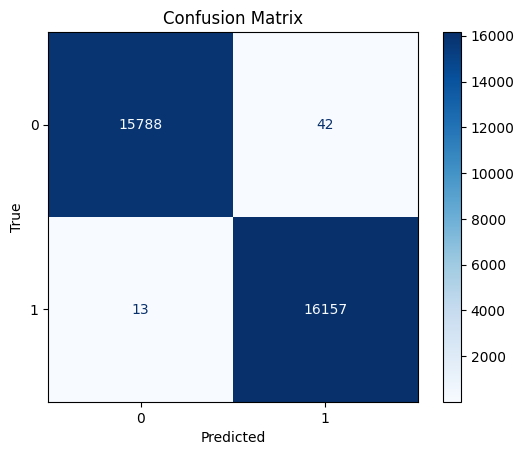

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_predictions)

# Create a ConfusionMatrixDisplay object
cm = ConfusionMatrixDisplay(confusion, display_labels=model.classes_)

# Plot the confusion matrix with a custom colormap
cm.plot(cmap=plt.cm.Blues)  # You can specify the format of the values (in this case, integer format)

# Add labels for x and y axis
plt.xlabel('Predicted')

plt.ylabel('True')

# Set the title
plt.title('Confusion Matrix')

plt.show()

# Gradient Boosting Classifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()


In [52]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Gradient Boosting Classifier'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 99.81%
Recall: 99.81%
Precision: 99.81%
F1-Score: 99.81%
time to train: 14.93 s
time to predict: 0.04 s
total: 14.97 s


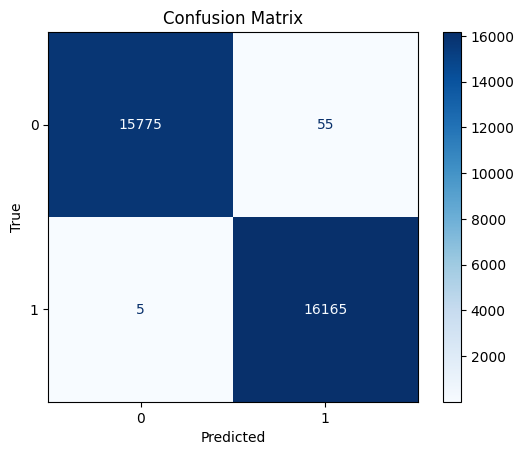

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_predictions)

# Create a ConfusionMatrixDisplay object
cm = ConfusionMatrixDisplay(confusion, display_labels=model.classes_)

# Plot the confusion matrix with a custom colormap
cm.plot(cmap=plt.cm.Blues)  # You can specify the format of the values (in this case, integer format)

# Add labels for x and y axis
plt.xlabel('Predicted')

plt.ylabel('True')

# Set the title
plt.title('Confusion Matrix')

plt.show()

# Neural Network MLP

In [55]:
from sklearn.neural_network import MLPClassifier
start = time.time()
model = MLPClassifier(hidden_layer_sizes = (20,20,), 
                      activation='relu', 
                      solver='adam',
                      batch_size=2000,
                      verbose=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [56]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['MLP'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 93.24%
Recall: 93.24%
Precision: 93.24%
F1-Score: 93.24%
time to train: 10.99 s
time to predict: 0.01 s
total: 10.99 s


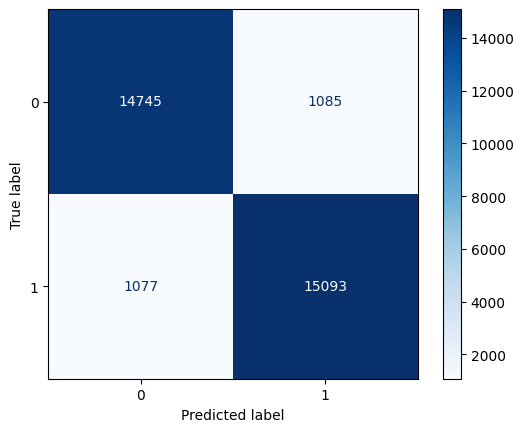

In [57]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_predictions)

# Create a ConfusionMatrixDisplay object
cm = ConfusionMatrixDisplay(confusion, display_labels=model.classes_)

# Plot the confusion matrix with a custom colormap
cm.plot(cmap=plt.cm.Blues)

plt.show()

In [58]:
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
Logistic,87.99%,87.99%,88.09%,87.98%,0.8,0.0,0.8
kNN,98.43%,98.43%,98.44%,98.43%,0.3,2.5,2.8
Decision Tree,99.72%,99.72%,99.73%,99.73%,0.2,0.0,0.2
Extra Trees,99.80%,99.80%,99.80%,99.80%,0.9,0.1,1.0
Random Forest,99.83%,99.83%,99.83%,99.83%,1.5,0.1,1.5
Gradient Boosting Classifier,99.81%,99.81%,99.81%,99.81%,14.9,0.0,15.0
MLP,93.24%,93.24%,93.24%,93.24%,11.0,0.0,11.0


# Neural Network MLP (Keras)

In [73]:
import time
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense  
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
#Build the feed forward neural network model
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=56, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy',f1_m,precision_m, recall_m]
                 )
    return model

# สร้างแบบจำลอง
model = build_model()

# แก้ไขรูปร่างข้อมูล X_train เพื่อให้มี 56 คอลัมน์
X_train = np.column_stack((X_train, np.zeros((X_train.shape[0], 56 - X_train.shape[1]))))

# ฝึกสอนแบบจำลอง
start = time.time()
model.fit(X_train, y_train, epochs=200, batch_size=2000, verbose=2)
end_train = time.time()


Epoch 1/200
64/64 - 1s - loss: 4437.4150 - accuracy: 0.4972 - f1_m: 0.6654 - precision_m: 0.4987 - recall_m: 1.0000 - 737ms/epoch - 12ms/step
Epoch 2/200
64/64 - 0s - loss: 270.3444 - accuracy: 0.7660 - f1_m: 0.6654 - precision_m: 0.4987 - recall_m: 1.0000 - 214ms/epoch - 3ms/step
Epoch 3/200
64/64 - 0s - loss: 109.7732 - accuracy: 0.7672 - f1_m: 0.6654 - precision_m: 0.4987 - recall_m: 1.0000 - 192ms/epoch - 3ms/step
Epoch 4/200
64/64 - 0s - loss: 92.2677 - accuracy: 0.7692 - f1_m: 0.6654 - precision_m: 0.4987 - recall_m: 1.0000 - 156ms/epoch - 2ms/step
Epoch 5/200
64/64 - 0s - loss: 65.1061 - accuracy: 0.7636 - f1_m: 0.6654 - precision_m: 0.4987 - recall_m: 1.0000 - 127ms/epoch - 2ms/step
Epoch 6/200
64/64 - 0s - loss: 39.8448 - accuracy: 0.7669 - f1_m: 0.6654 - precision_m: 0.4987 - recall_m: 1.0000 - 126ms/epoch - 2ms/step
Epoch 7/200
64/64 - 0s - loss: 38.6983 - accuracy: 0.7607 - f1_m: 0.6654 - precision_m: 0.4987 - recall_m: 1.0000 - 124ms/epoch - 2ms/step
Epoch 8/200
64/64 - 0s

In [76]:
# ประเมินแบบจำลองด้วยข้อมูลทดสอบ
X_test = np.column_stack((X_test, np.zeros((X_test.shape[0], 56 - X_test.shape[1]))))
loss, accuracy, f1s, precision, recall = model.evaluate(X_test, y_test)
end_predict = time.time()

# แสดงผลประสิทธิภาพของแบบจำลอง
model_performance.loc['MLP (Keras)'] = [accuracy, accuracy, accuracy, accuracy, end_train - start, end_predict - end_train, end_predict - start]

1000/1000 [==============================] - 1s 928us/step - loss: 27.9937 - accuracy: 0.8568 - f1_m: 0.6670 - precision_m: 0.5053 - recall_m: 1.0000
